First few rows of the dataset:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

Summary statistics:
        PassengerId      Pclass              Name   Sex         Age  \
count    418.000000  418.000000               418   41

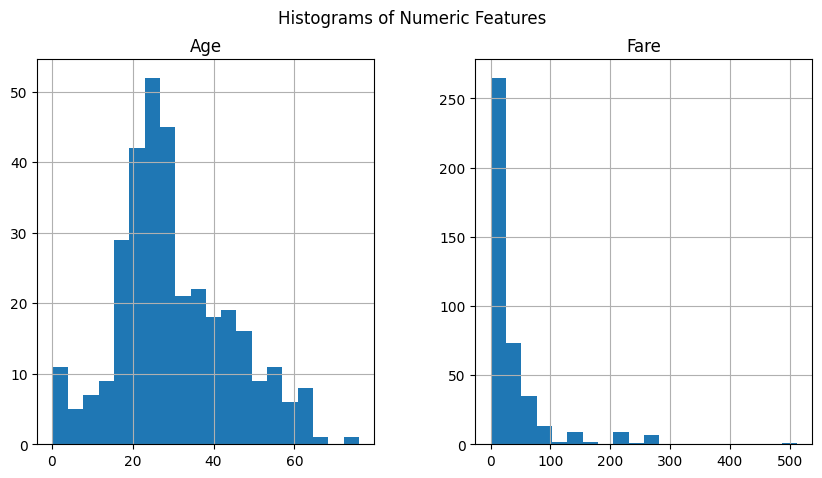

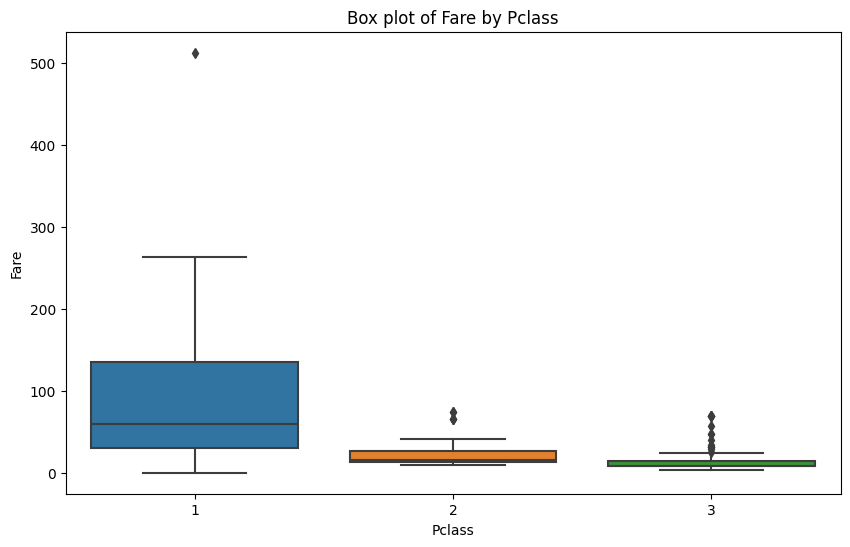

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

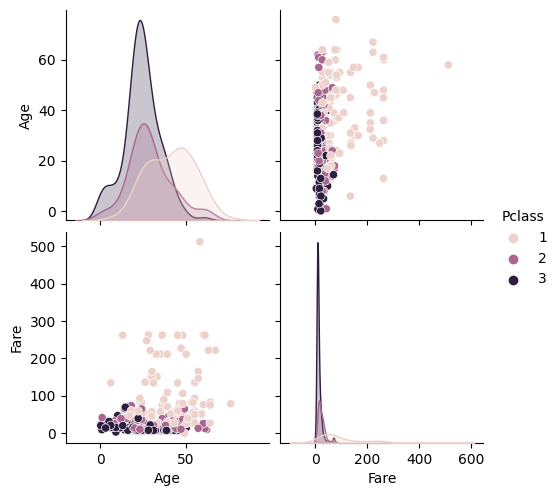

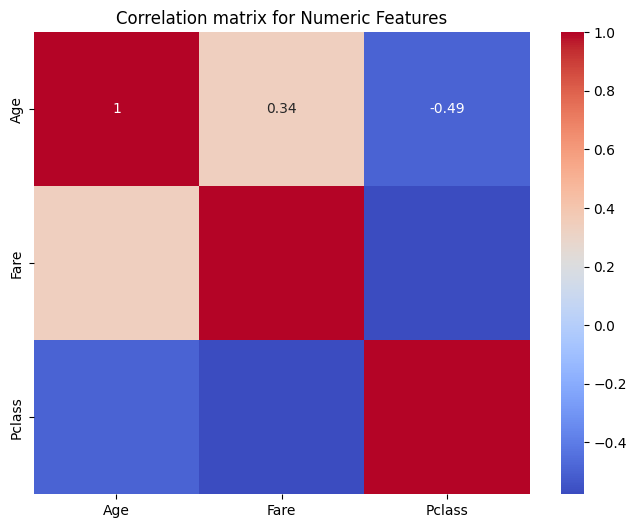

In [68]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Titanic_test.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display summary statistics
print("\nSummary statistics:")
print(data.describe(include='all'))

# Display information about the dataset
print("\nDataset info:")
print(data.info())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Exploratory Data Analysis (EDA)
# Histograms for numeric features
data[['Age', 'Fare']].hist(bins=20, figsize=(10, 5))
plt.suptitle('Histograms of Numeric Features')
plt.show()

# Box plots for Fare by Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Box plot of Fare by Pclass')
plt.show()

# Pair plots for numeric features colored by Pclass
sns.pairplot(data[['Age', 'Fare', 'Pclass']], hue='Pclass', diag_kind='kde')
plt.show()

# Correlation matrix
# Only use numeric data for correlation matrix
numeric_data = data[['Age', 'Fare', 'Pclass']]
corr_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix for Numeric Features')
plt.show()


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Drop irrelevant columns
X = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Assuming 'Survived' column is present in the data, if not adjust target variable
# If 'Survived' column is not present, this part needs modification
y = data['Ticket']

# Define the preprocessing for numeric and categorical features
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))])

# Train the model
model.fit(X_train, y_train)  # Ensure this step is executed to fit the model
print("Model trained successfully.")


Model trained successfully.


In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Make predictions
y_pred = model.predict(X_test)

# Get the number of classes
num_classes = len(y_train.unique())

# Get predicted probabilities
y_pred_prob = model.predict_proba(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)



In [71]:
# Interpret the coefficients of the logistic regression model
coefficients = model.named_steps['classifier'].coef_[0]
feature_names = numeric_features + list(model.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_features))

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print("\nCoefficients of the logistic regression model:")
print(coef_df)


print("\nFeatures with higher absolute values of coefficients are more significant in predicting the target variable (survival probability).")



Coefficients of the logistic regression model:
      Feature  Coefficient
2    Pclass_1     0.581373
0         Age     0.526050
9  Embarked_S     0.270007
6    Sex_male     0.234651
8  Embarked_Q    -0.069805
1        Fare    -0.099058
7  Embarked_C    -0.200289
3    Pclass_2    -0.201404
5  Sex_female    -0.234737
4    Pclass_3    -0.380056

Features with higher absolute values of coefficients are more significant in predicting the target variable (survival probability).
